# Global Video Game Sales - Data Analysis

## Introduction

In this analysis, I examine the evolution of global video game sales data, focusing on variations across genres and platforms in different regions and among various publishers through the following questions:

1. How have video game sales trends changed over the years?
2. Which regions have the highest sales for video games?
3. How do sales trends (greater than 100 million) vary by platform?
4. Top Ten Publishers have the Highest Sales Figures.
5. Average Sales by Genre For Each Region.
6. Determine the Top 5 Publishers by Global Sales and Specify Their Top 5 Genres.

#### Imports

In [15]:
# load related packaes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


# load related dataset

sales = pd.read_csv('../Data/global_video_game_sales.csv')


#### Data Exploration

In [4]:
# Find missing values in both dfs
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
# Explore dataset
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000
mean,8293.056757,1976.790846,0.285488,0.157714,0.104155,0.050868,0.598443
std,4917.895465,238.905301,0.940182,0.572520,0.364020,0.214558,1.789962
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3963.250000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8325.500000,2007.000000,0.070000,0.020000,0.000000,0.010000,0.170000
75%,12644.750000,2010.000000,0.240000,0.110000,0.060000,0.030000,0.500000
max,16599.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
# removing year(s) with 0 value
sales = sales[sales['Year'] != 0]
sales['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017], dtype=int64)

In [8]:
# current dataset
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon RedPokemon Blue,GB,1996,Role Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
11465,16592,Chou Ezaru wa Akai Hana Koi wa Tsuki ni Shirub...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
11466,16593,Eiyuu Densetsu Sora no Kiseki Material Collect...,PSP,2007,Role Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
11467,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
11468,16596,Woody Woodpecker in Crazy Castle Five,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01


## Data Analysis and Visualization

### 1. How have video game sales trends changed over the years?

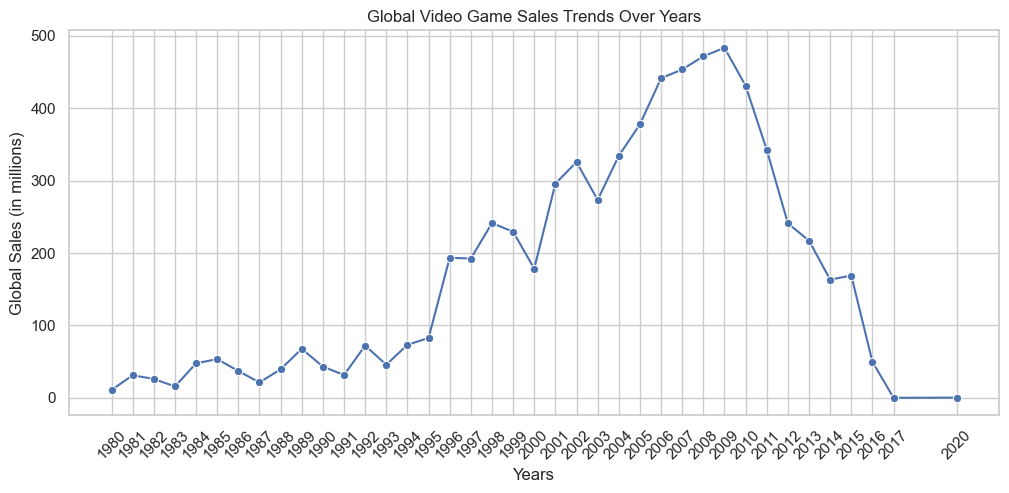

In [8]:
# Aggregate global sales by year
yearly_sales = sales.groupby('Year').agg({'Global_Sales': 'sum'}).reset_index()

# Set the Seaborn theme with a white grid background
sns.set_theme(style="whitegrid")

# Visualization
# Plot the sales trends over years
plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_sales, x='Year', y='Global_Sales', marker='o')

# Add titles and labels
plt.title('Global Video Game Sales Trends Over Years')
plt.xlabel('Years')
plt.ylabel('Global Sales (in millions)')
plt.xticks(yearly_sales['Year'])
plt.grid(True)
plt.xticks(rotation=45);


### - Density of Global Video Game Sales Over the Years

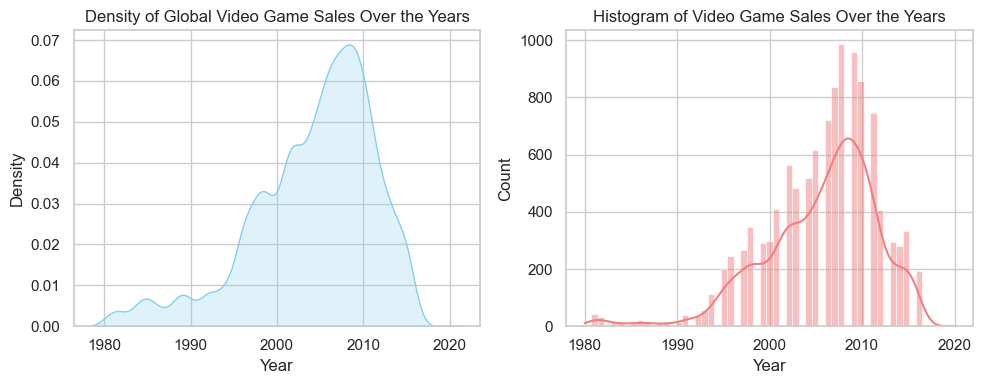

In [9]:
# Set the theme and pastel color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Create a KDE plot for overall sales trends
sns.kdeplot(data=sales, x='Year', weights='Global_Sales', fill=True, bw_adjust=0.5, ax=axes[0], color='skyblue')
axes[0].set_title('Density of Global Video Game Sales Over the Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# Create a histogram with a KDE overlay
sns.histplot(data=sales, x='Year', kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Histogram of Video Game Sales Over the Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout();

### 2. Which regions have the highest sales for video games?

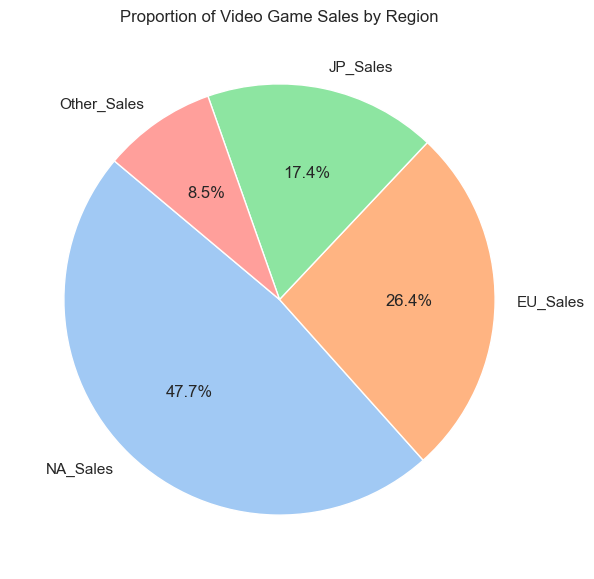

In [4]:
# Sum sales by region
region_sales = sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualization
# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Proportion of Video Game Sales by Region');

### 3. How do sales trends (greater than 100 million) vary by platform?

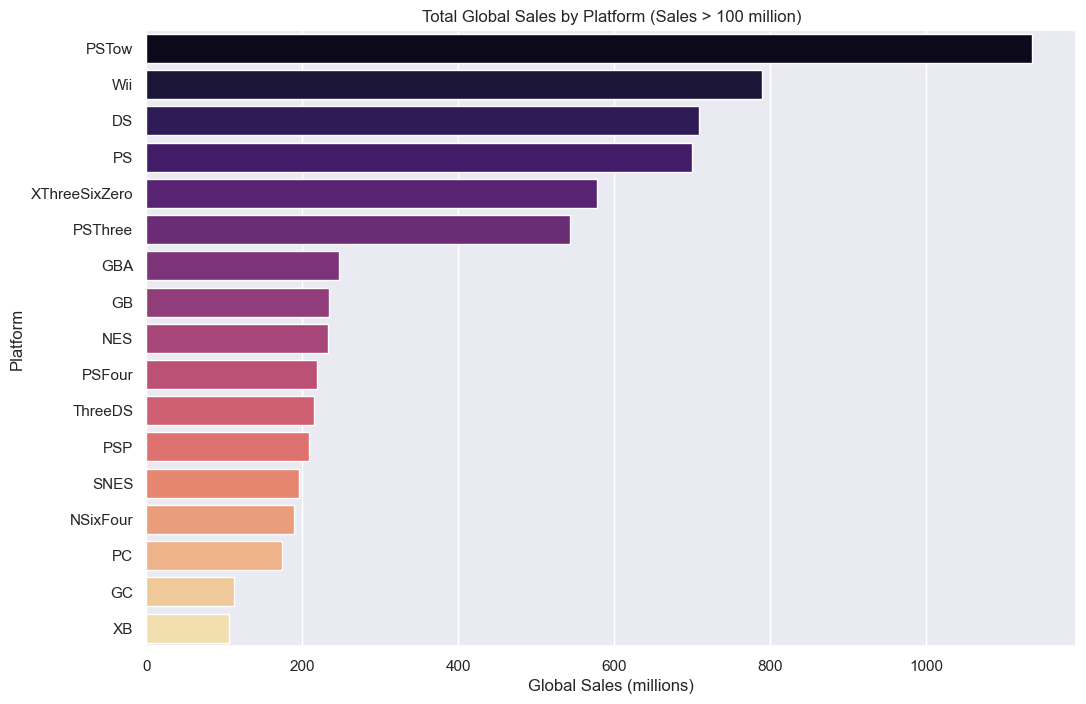

In [13]:
# Sum global sales by platform
platform_sales = sales.groupby('Platform')['Global_Sales'].sum().reset_index()

# Filter platforms with total sales greater than 100 million
platform_sales_filtered = platform_sales[platform_sales['Global_Sales'] > 100]

# Sort the platforms by total global sales in descending order
platform_sales_sorted = platform_sales_filtered.sort_values(by='Global_Sales', ascending=False)

# Visualization
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=platform_sales_sorted, x='Global_Sales', y='Platform', palette='magma')

# Add title and labels
plt.title('Total Global Sales by Platform (Sales > 100 million)')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Platform');

### 4. Top Ten Publishers have the Highest Sales Figures.

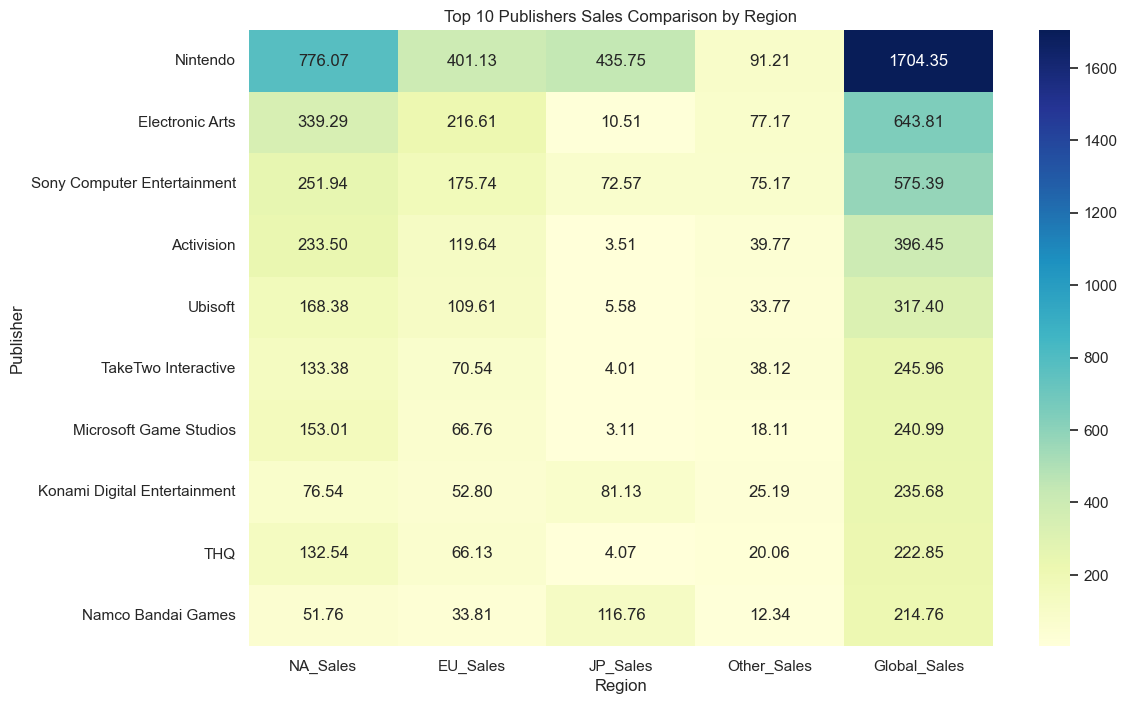

In [4]:
# Filtering data
publisher_sales = sales.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

# Get the top 10 publishers by global sales
top_publishers = publisher_sales.sum(axis=1).nlargest(10).index

# Visualization
# Filter publisher_sales to include only the top 10 publishers
top_publisher_sales = publisher_sales.loc[top_publishers]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_publisher_sales, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Top 10 Publishers Sales Comparison by Region')
plt.xlabel('Region')
plt.ylabel('Publisher');


### - Top 5 Publishers With Different Visualization Method

In [12]:
#Aggregates sales data for each publisher
publisher_sales = sales.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Get the top 10 publishers by global sales
top_publishers = publisher_sales.sum(axis=1).nlargest(5).index

# Filter publisher_sales to include only the top 10 publishers
top_publisher_sales = publisher_sales.loc[top_publishers]
top_publisher_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Nintendo,777.19,401.57,435.87,91.31
Electronic Arts,346.07,219.57,10.56,78.60
Sony Computer Entertainment,251.94,175.91,72.57,75.22
Activision,234.92,119.77,3.51,39.81
Ubisoft,169.00,109.90,5.75,33.87


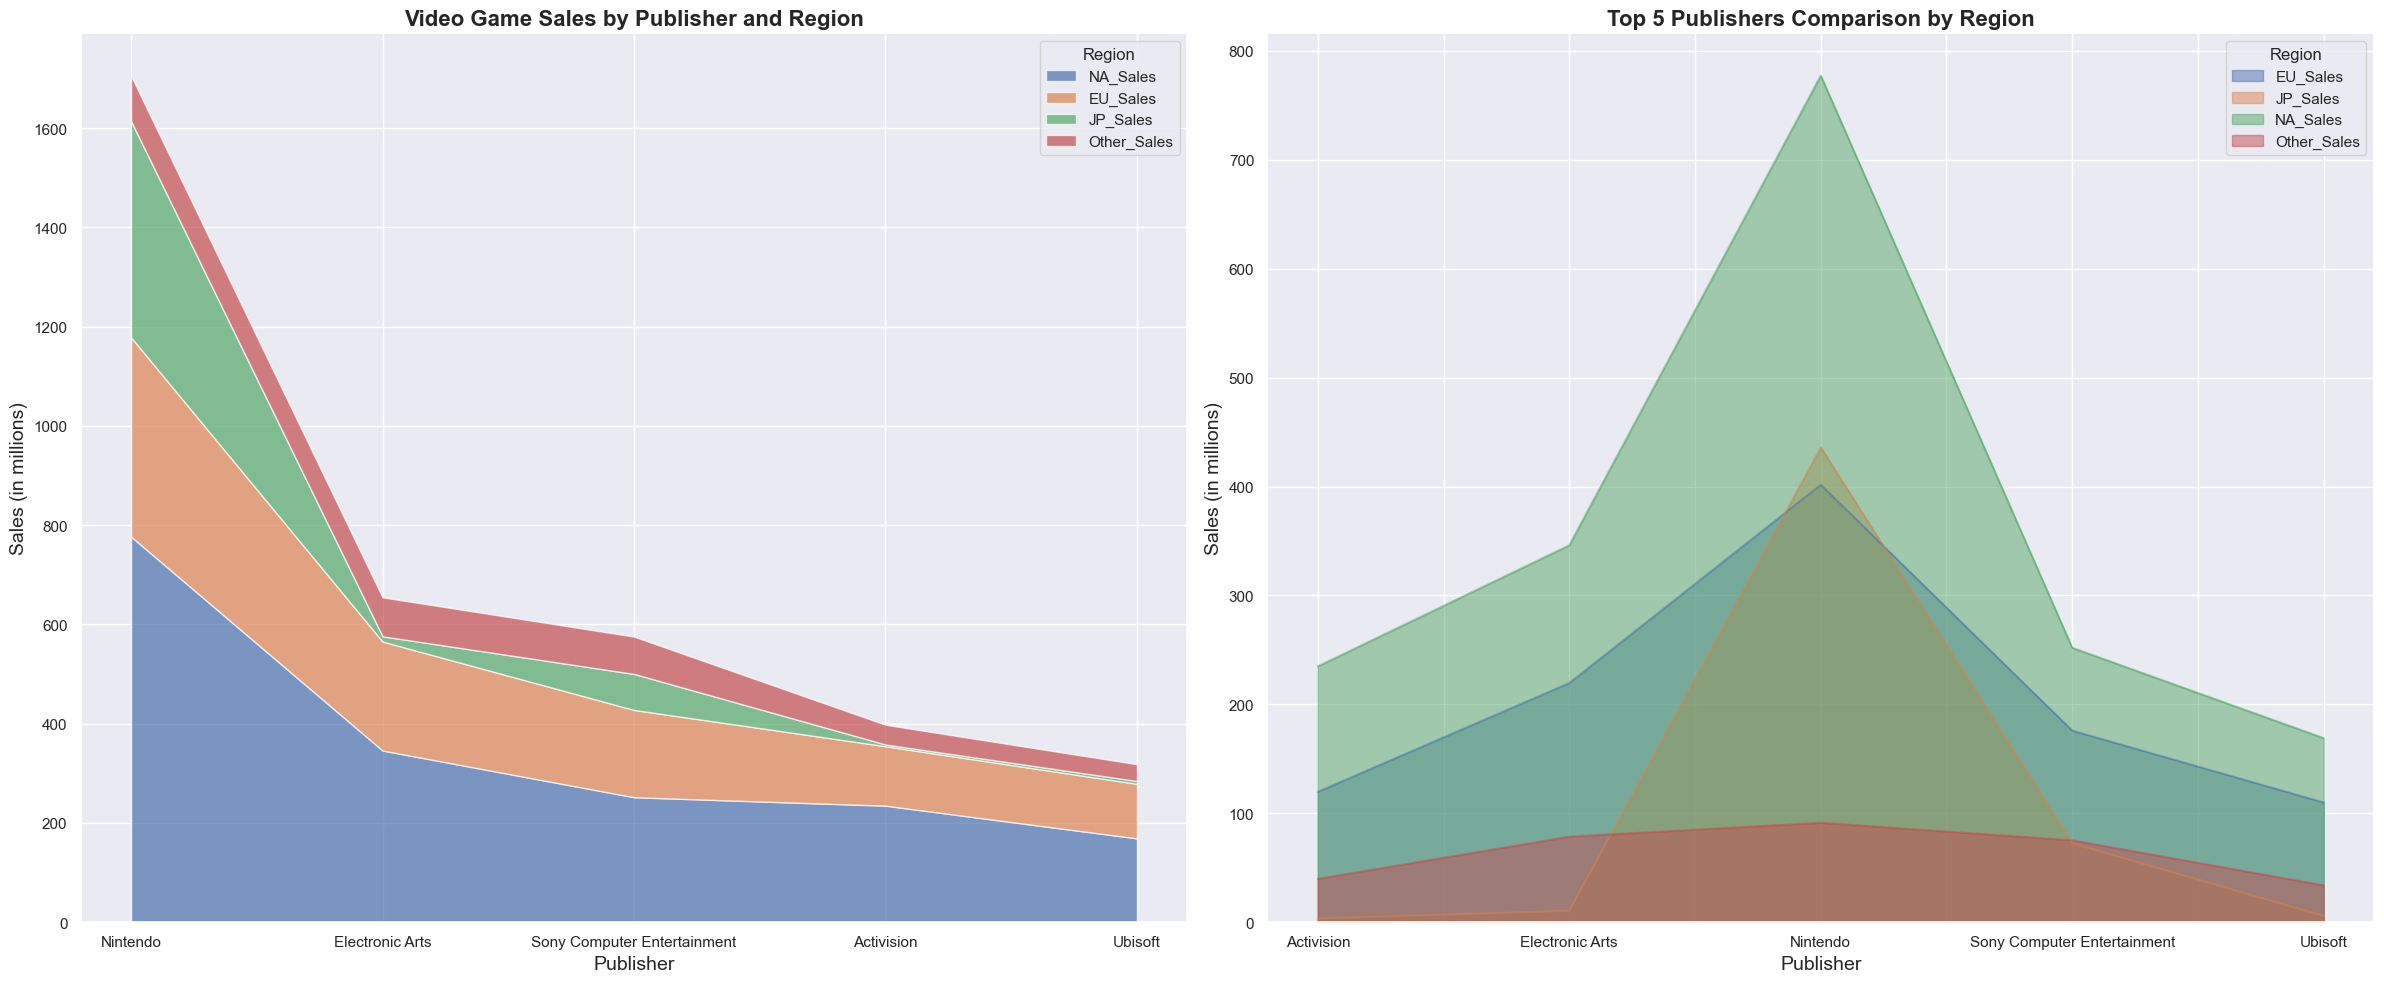

In [14]:
# Initialize the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Plotting the stacked area plot on the first subplot
axes[0].stackplot(top_publisher_sales.index, 
                  top_publisher_sales.T, 
                  labels=top_publisher_sales.columns, 
                  alpha=0.7)
axes[0].set_title('Video Game Sales by Publisher and Region', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Publisher', fontsize=14)
axes[0].set_ylabel('Sales (in millions)', fontsize=14)
axes[0].legend(title='Region', loc='upper right')
axes[0].tick_params(axis='x')

# Step 2: Pivot the Data for Plotting
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
publisher_sales_pivot = top_publisher_sales.pivot_table(index='Publisher', values=regions)

# Plotting the second area plot
publisher_sales_pivot.plot(kind='area', stacked=False, ax=axes[1])
axes[1].set_title('Top 5 Publishers Comparison by Region', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Publisher', fontsize=14)
axes[1].set_ylabel('Sales (in millions)', fontsize=14)
axes[1].legend(title='Region')
axes[1].tick_params(axis='x')

plt.tight_layout();



### 5. Average Sales by Genre For Each Region.

<Figure size 1400x800 with 0 Axes>

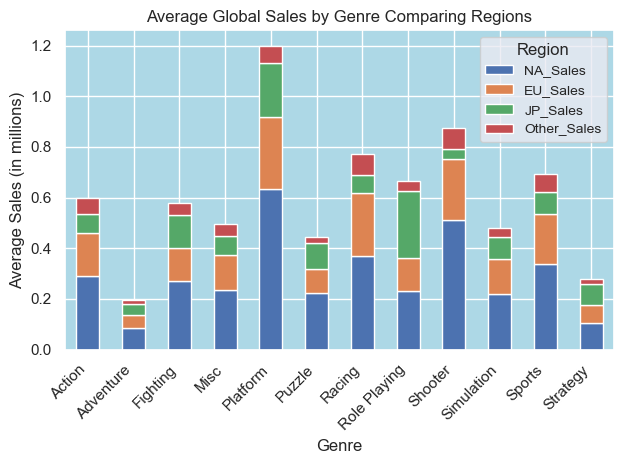

In [7]:
# Average sales by genre for each region
genre_sales = sales.groupby('Genre').agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean',
    'Other_Sales': 'mean',
}).reset_index()

# Set the index to Genre for easier plotting
genre_sales.set_index('Genre', inplace=True)

# Visualization
# Plotting the average sales by genre across different regions
plt.figure(figsize=(14, 8), facecolor='lightblue')  # Change the figure background color to soft blue
ax = genre_sales.plot(kind='bar', stacked=True)
ax.set_facecolor('lightblue')  # Change the axes background color to soft blue
plt.title('Average Global Sales by Genre Comparing Regions')
plt.xlabel('Genre')
plt.ylabel('Average Sales (in millions)')
plt.legend(title='Region', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

### 6. Determine the Top 5 Publishers by Global Sales and Specify Their Top 5 Genres.

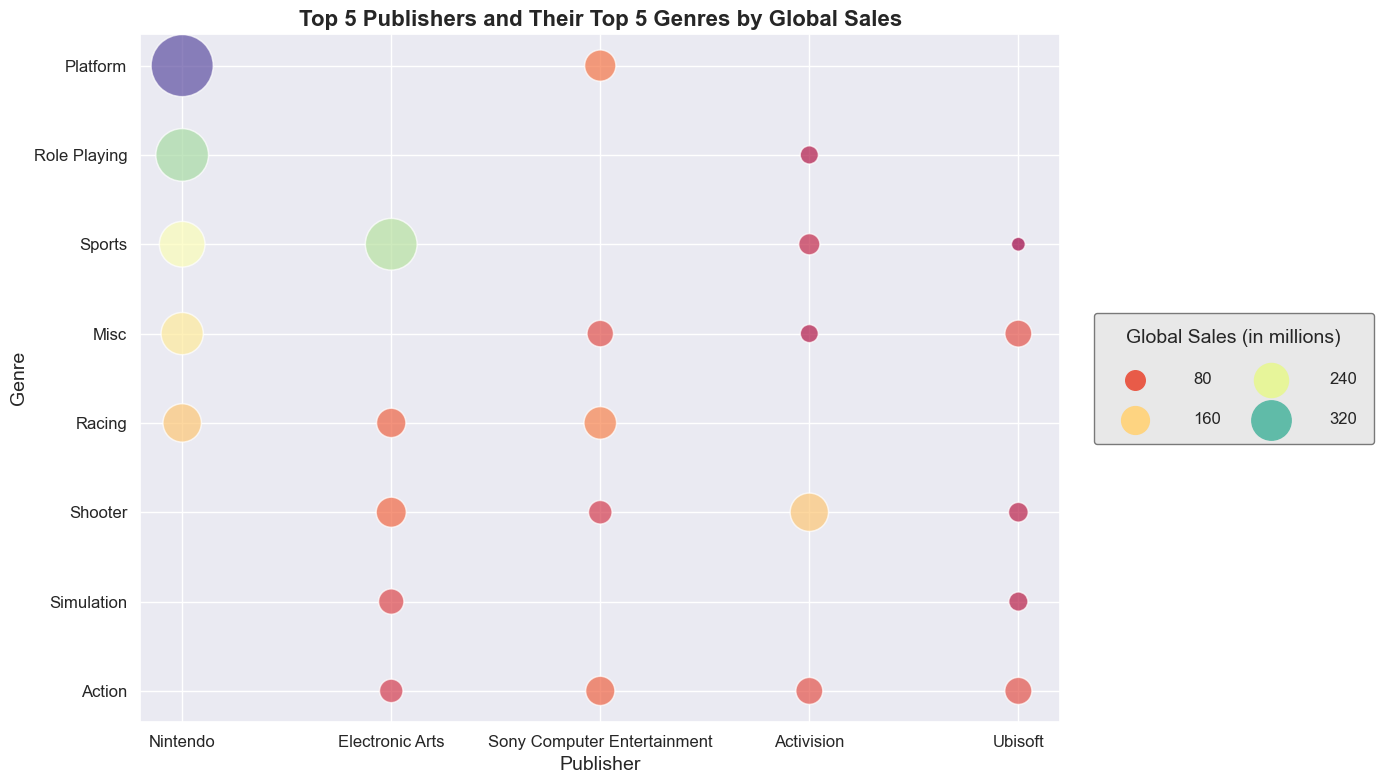

In [9]:
# Ensure 'Global_Sales' is numeric
sales['Global_Sales'] = pd.to_numeric(sales['Global_Sales'], errors='coerce')

# Group by Publisher and sum the Global Sales, then sort and take the top 5
top_publishers = sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# Initialize an empty list to store the top genres for each publisher
top_publishers_genres = []

# Iterate over the top publishers to find their top 5 genres
for publisher in top_publishers.index:
    # Filter the dataset for the current publisher
    publisher_data = sales[sales['Publisher'] == publisher]

    # Group by Genre and sum the Global Sales for the current publisher
    top_genres = publisher_data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

    # Append the top genres to the list
    for genre, sales_amount in top_genres.items():
        top_publishers_genres.append({'Publisher': publisher, 'Genre': genre, 'Global_Sales': sales_amount})

# Convert the list to a DataFrame
top_publishers_genres_df = pd.DataFrame(top_publishers_genres)

# Visualization
# Plotting the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_publishers_genres_df, x='Publisher', y='Genre', size='Global_Sales', hue='Global_Sales',
    palette='Spectral', sizes=(100, 2000), legend='brief', alpha=0.7)
plt.title('Top 5 Publishers and Their Top 5 Genres by Global Sales', fontsize=16, fontweight='bold')
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

legend = plt.legend(loc='center left', title='Global Sales (in millions)',
                    ncol=2, title_fontsize='14', fontsize='12', 
                    borderpad=1, labelspacing=1.5, markerscale=0.7, 
                    borderaxespad=2, columnspacing=1.5, handletextpad=2, handlelength=3,
                    bbox_to_anchor=(1, 0.5))  # Move legend outside the plot

# Change the background color of the legend
legend.get_frame().set_facecolor('lightgrey')  # Set the background color to light blue
legend.get_frame().set_edgecolor('black')      # Set the edge color
legend.get_frame().set_alpha(0.5)              # Set the transparency level

plt.tight_layout()
plt.grid(True);
